In [1]:
def tv(sigma_H, sigma_V, n_H, n_V):
    # compute intersection matrix B
    B = matrix([len(set(cycleH) & set(cycleV)) for cycleV in sigma_V.cycle_tuples()]
               for cycleH in sigma_H.cycle_tuples())
    
    A_H = diagonal_matrix(n_H)
    A_V = diagonal_matrix(n_V)
    
    E_H = A_H * B * A_V * B.T
    E_V = A_V * B.T * A_H * B
    
    _, [a_H], _ = max(E_H.eigenvectors_right(), key=lambda x: x[0])
    _, [a_V], _ = max(E_V.eigenvectors_right(), key=lambda x: x[0])
    
    return a_H, a_V

In [2]:
tv(Permutation([1, 3, 2]), Permutation([2, 1, 3]), [3, 1], [1, 3])

((1, 0.7675918792439982?), (1, 1.302775637731995?))

# Attempting the genus 2 computations

In [3]:
def l_surface(n):
    Q = matrix([[0, 0, 1, 0],
                [0, 0, 1, 1],
                [1, 1, 0, 0],
                [0, 1, 0, 0]])
    Q = diagonal_matrix([n, 1, 1, n]) * Q
    
    L.<a> = QuadraticField(1 + 4 * n)
    lmbd = (1 + a)/2
    A = lmbd * identity_matrix(4) - Q
    h1, h2, h3, h4 = A.right_kernel().basis_matrix()[0]
    
    return [h1/min(h1, h2), h2/min(h1, h2), h3/min(h3, h4), h4/min(h3, h4)]

In [4]:
h1, h2, h3, h4 = l_surface(5)
m1 = h1/h3
m2 = h2/(h3 + h4)
m3 = h3/(h1 + h2)
m4 = h4/h2

H = matrix([[1, 1/m2], [0, 1]])
V = matrix([[1, 0], [1/m3, 1]])

QQbar(h3 + h4) / 3

0.930429282492640?

In [5]:
B = matrix(QQbar, 2, 2, [1, 0, 1, 1])
E = block_matrix(2, 2, [0, B, B.transpose(), 0])
print(E)
E.right_eigenvectors()

[0 0|1 0]
[0 0|1 1]
[---+---]
[1 1|0 0]
[0 1|0 0]


[(1.618033988749895?,
  [
  (1.000000000000000?, 1.618033988749895?, 1.618033988749895?, 1.000000000000000?)
  ],
  1),
 (0.618033988749895?,
  [
  (1.000000000000000?, -0.618033988749895?, 0.618033988749895?, -1.000000000000000?)
  ],
  1),
 (-0.618033988749895?,
  [
  (1.000000000000000?, -0.618033988749895?, -0.618033988749895?, 1.000000000000000?)
  ],
  1),
 (-1.618033988749895?,
  [
  (1.000000000000000?, 1.618033988749895?, -1.618033988749895?, -1.000000000000000?)
  ],
  1)]

# Computing cylinders

In [1]:
import numpy as np
from pprint import pprint

from tv import Rectangle, TV

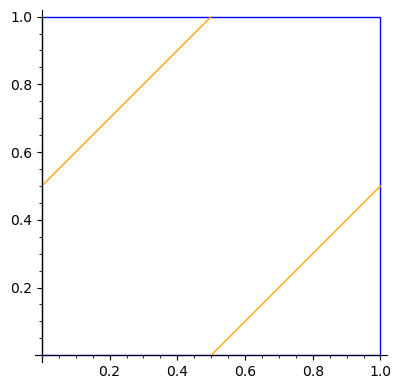

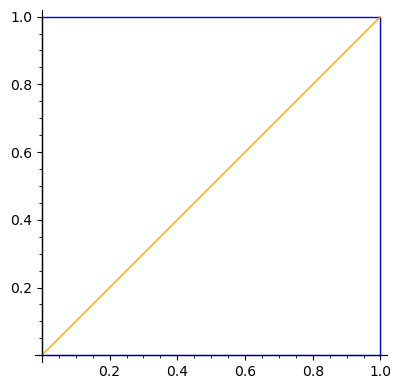

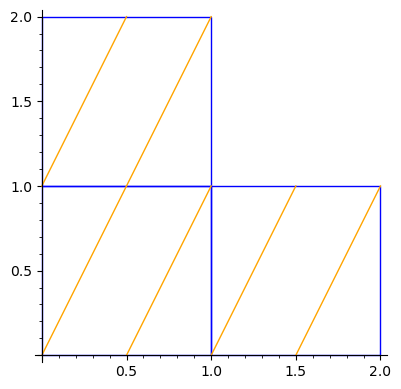

In [2]:
s = Rectangle(1, 1)
sq_t = TV(QQ, (s,), (0,), (0,))
segs = sq_t.flow(0, np.array([1/2, 0]), 1)
sq_t.plot([], segs=segs).show()
segs = sq_t.flow(0, np.zeros(2), 1)
sq_t.plot([], segs=segs).show()

square_l = TV(QQ, (s, s, s), (1, 0, 2), (2, 1, 0))
segs = square_l.decompose(2)
square_l.plot([(0, 'r', 1), (0, 'u', 2)], segs=segs).show()

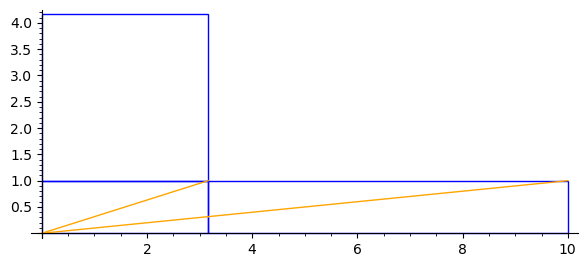

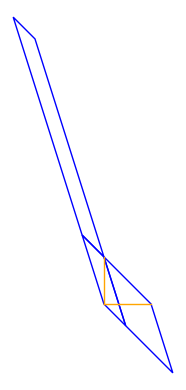

In [3]:
x = TV.prym2(40)
instrs = [(0, 'r', 1), (0, 'u', 2)]
lmbd = x.rectangles[2].base

segs1 = x.flow(0, np.zeros(2, dtype=type(x.field)), QQ(1/10))
segs2 = x.flow(0, np.zeros(2, dtype=type(x.field)), 1/lmbd)
x.plot(instrs, segs=segs1+segs2).show()

m1inv = 1/(10 - lmbd) * np.array([[1, -lmbd], [-1, 10]], dtype=type(x.field))
lmbd1 = (-2 + x.field.gen())/2
g =  lmbd1 * m1inv

plt = x.plot(instrs, segs=segs1+segs2)
objs1 = []
for obj in plt:
    if len(obj) == 4:
        objs1.append(polygon2d([g.dot(pt) for pt in obj], fill=False))
    else:
        objs1.append(line2d([g.dot(pt) for pt in obj], color='orange'))
plt1 = sum(objs1)
plt1.show(axes=False)

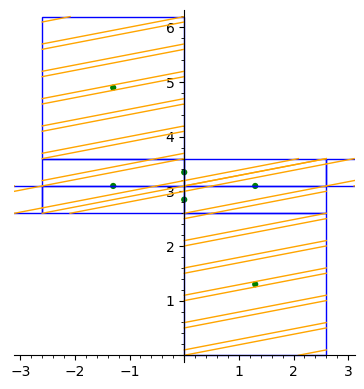

In [4]:
x = TV.prym4(108)
instrs = [(0, 'u', 3), (3, 'l', 2), (2, 'l', 1), (3, 'u', 5),
        (5, 'r', 6), (5, 'l', 4), (4, 'u', 7)]

lmbd = 2 * x.rectangles[0].base

sq = x.rectangles[0]
rmid = x.rectangles[2]
rlong = x.rectangles[1]

k = parent(sq.base)
points = [(0, np.array([sq.base/2, sq.height/2])),
         (1, np.array([rlong.base/2, k(1/4)])),
         (3, np.array([k(0), k(1/4)])),
         (4, np.array([rmid.base/2, k(0)])),
         (5, np.array([k(0), k(1/4)])),
         (5, np.array([rmid.base/2, k(0)])),
         (6, np.array([rlong.base/2, k(1/4)])),
         (7, np.array([sq.base/2, sq.height/2]))]

segs = x.decompose(1/lmbd)
x.plot(instrs, segs=segs, points=points).show(xmin=-3, xmax=3)

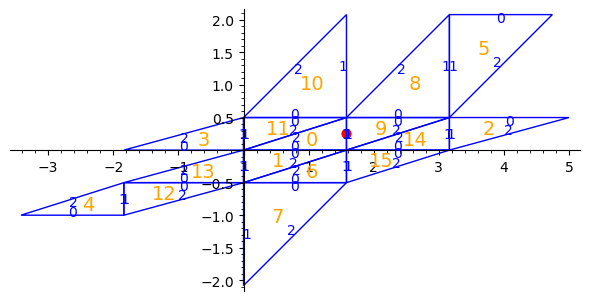

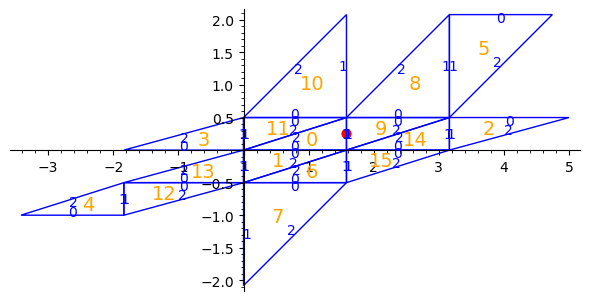

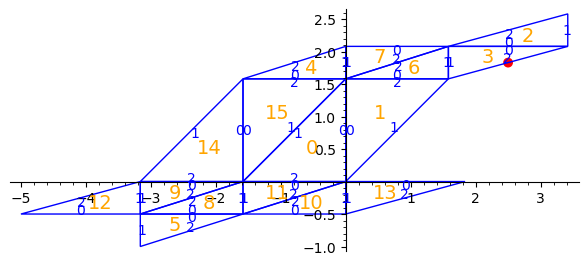

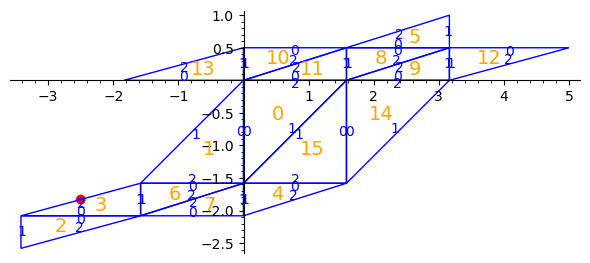

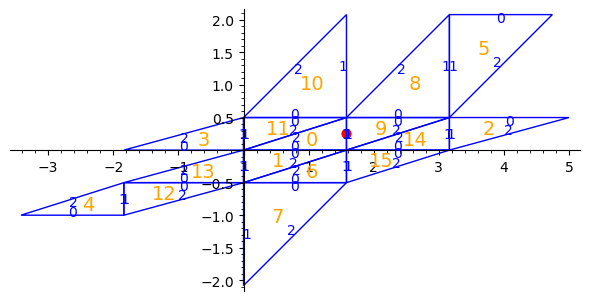

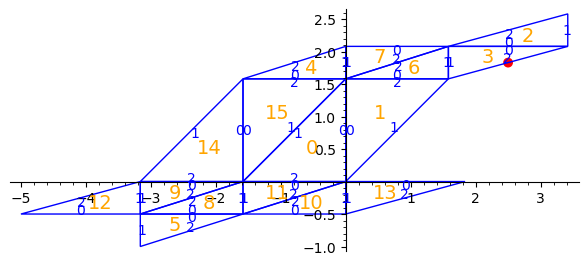

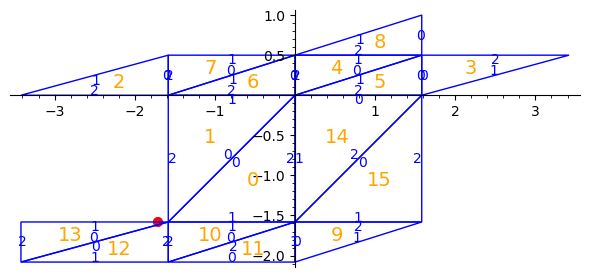

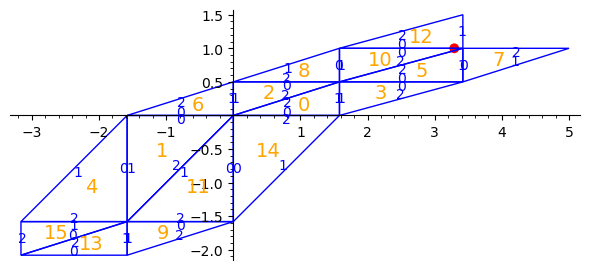

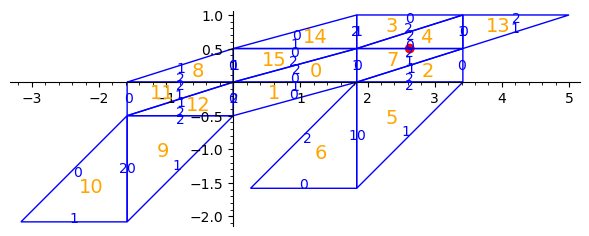

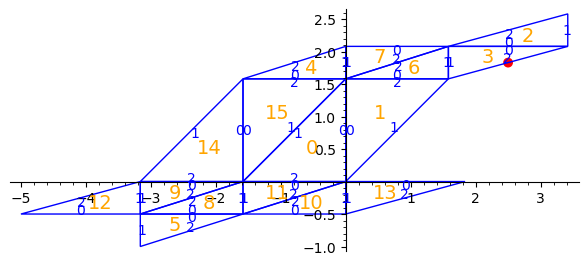

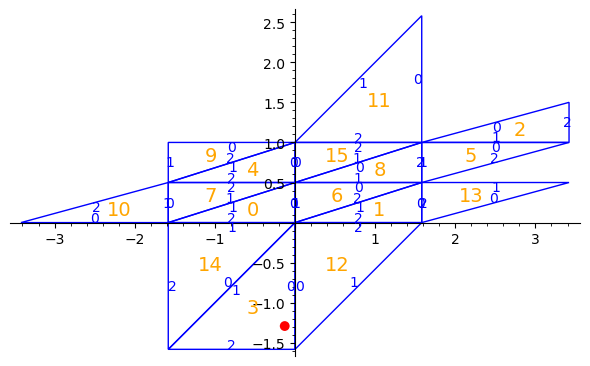

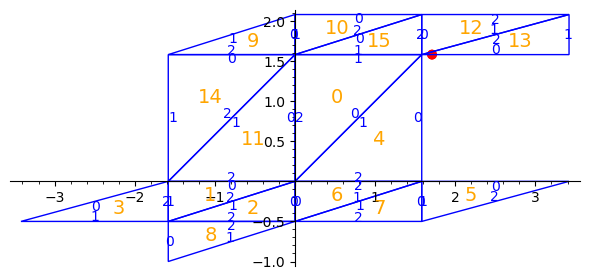

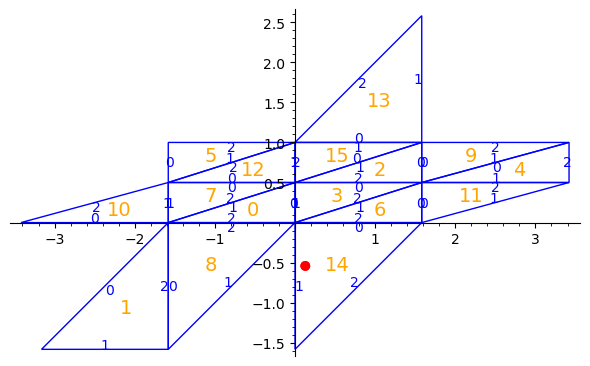

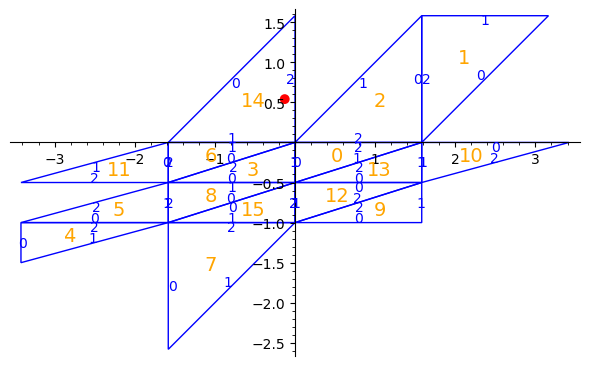

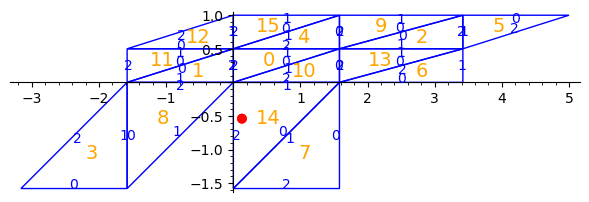

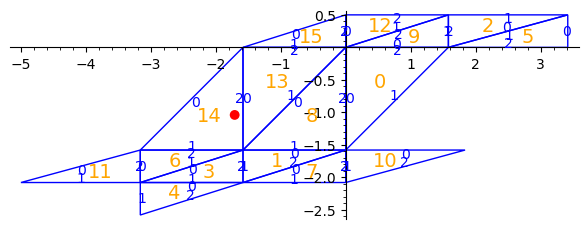

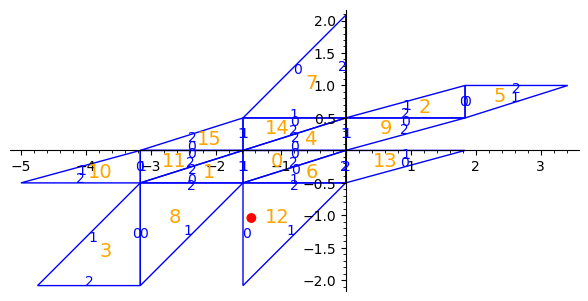

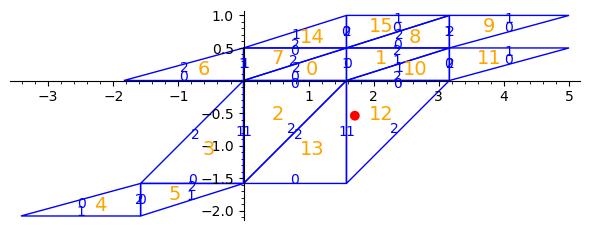

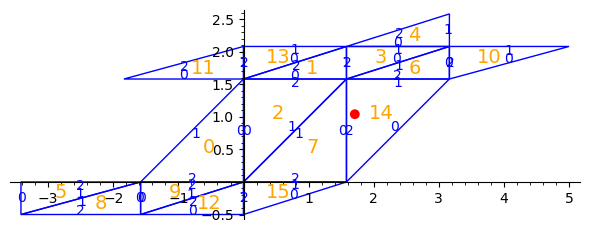

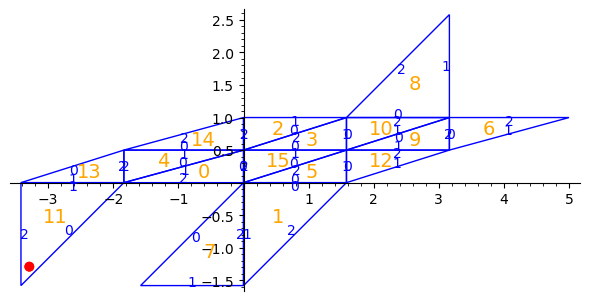

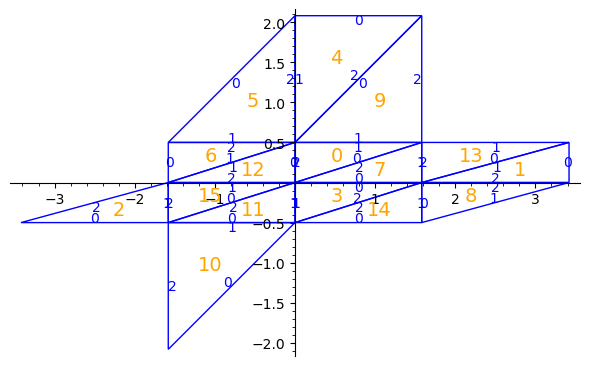

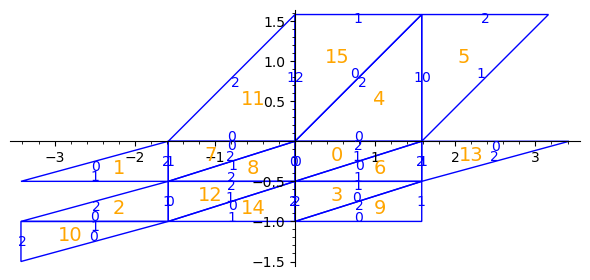

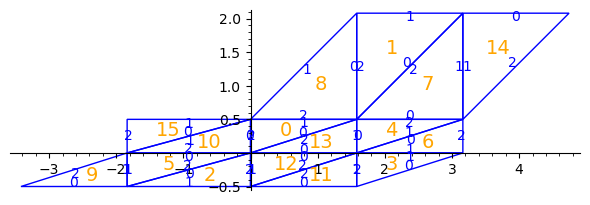

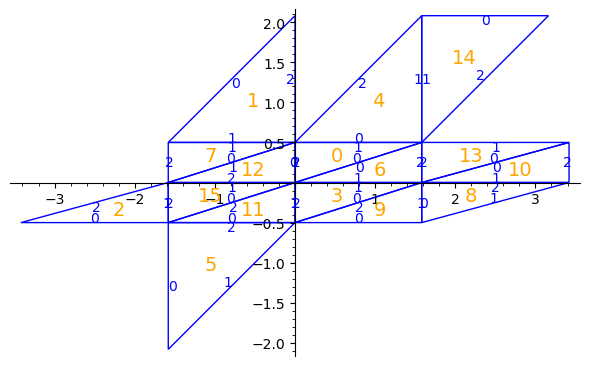

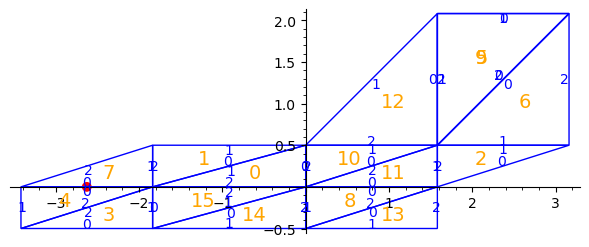

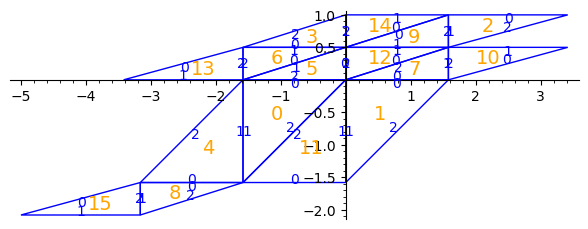

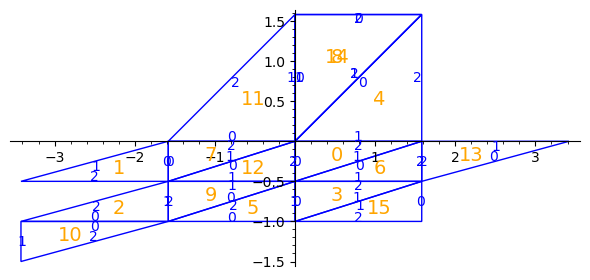

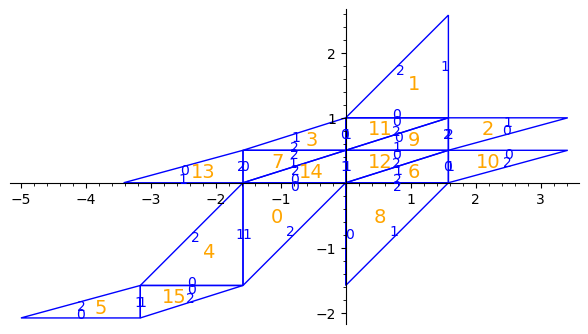

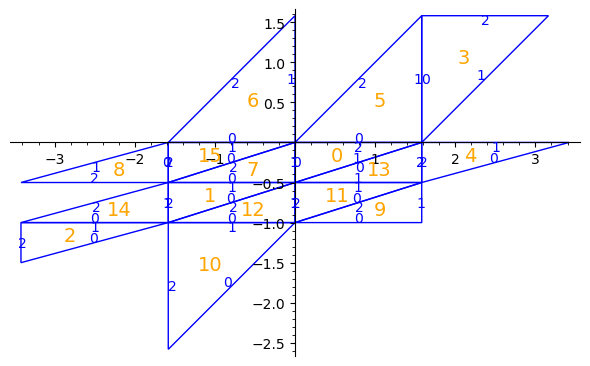

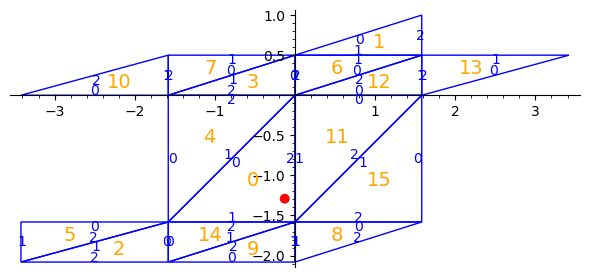

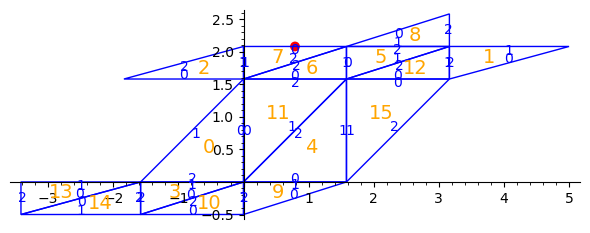

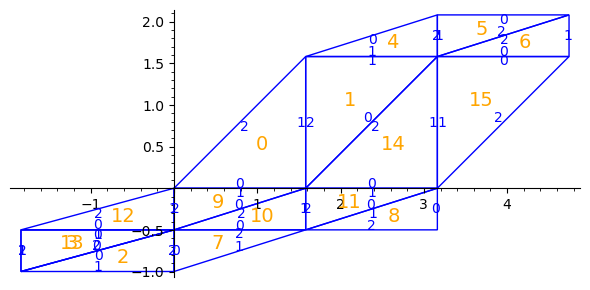

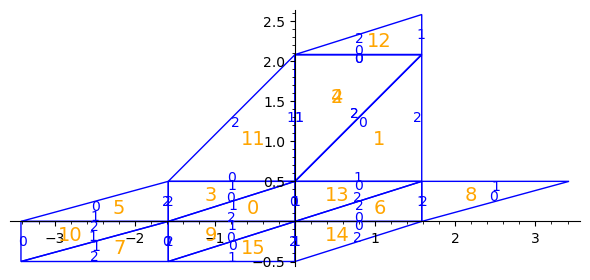

KeyboardInterrupt: 

In [11]:
from tv import TV

def sigma(mat):
    [[a, b], [c, d]] = mat
    return matrix([[a, -b], [-c, d]])

y = TV.prym4(40)._to_samsurf()
y = y.mark_point(4, (0, 0.5, 0.5), (1, 0, 0))
y.plot()
for g in y.generators_veech.gens:
    y.apply_matrix(sigma(g)).make_delaunay(equiv_trin=y).plot().show()